Things I'd like to be able to do from just importing the raw file:
* Remove rows with blank cells (dq/dv value doesn't exist for a lot of the data points...I think this bloats the matrix size)
* Assign cycle number and differentiate between each cycle
* Split the charge (Bottom) from the discharge (top)
* Stagger the y axis to add separation between each curve
* Interpolate/smooth average/moving average to smooth the data (within what is acceptable)
* Add gradient color for each cycle number

Happy pythoning! Let me know if you have questions and if you have luck with this.

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [2]:
%matplotlib inline

## Merge Data Sets (after in csv format)

In [3]:
data1 = pd.read_csv('Dqdvdata.csv', header = 15)
data1.set_index('Unnamed: 0', inplace = True)
data2 = pd.read_csv('data2.csv', header = 13)
data2.drop(data2.index[0], inplace = True)
data2.set_index('Rec', inplace = True)

In [6]:
data2.head()
#had to reindex 

,Cycle P,Cycle C,Step,TestTime,StepTime,Cap. [Ah],Ener. [Wh],Current [A],Voltage [V],Md,...,VAR6,VAR7,VAR8,VAR9,VAR10,VAR11,VAR12,VAR13,VAR14,VAR15
Rec,,,,,,,,,,,,,,,,,,,,,
1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.7736,R,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,0.0,1.0,1.0,10.0,10.0,0.0,0.0,0.0,2.8022,R,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,0.0,1.0,1.0,20.0,20.0,0.0,0.0,0.0,2.7952,R,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,0.0,1.0,1.0,30.0,30.0,0.0,0.0,0.0,2.7812,R,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,0.0,1.0,1.0,40.0,40.0,0.0,0.0,0.0,2.7645,R,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
data1.head()

,[V],[C/V]
Unnamed: 0,,
1,2.7736,NaN
2,2.8022,0.0
3,2.7952,0.0
4,2.7812,0.0
5,2.7645,0.0


In [8]:
datatot = pd.concat([data1, data2], axis=1)

In [9]:
datatot.shape

(277162, 29)

In [10]:
datatot.head()
#now we have all the data in one dataframe, called datatot

,[V],[C/V],Cycle P,Cycle C,Step,TestTime,StepTime,Cap. [Ah],Ener. [Wh],Current [A],...,VAR6,VAR7,VAR8,VAR9,VAR10,VAR11,VAR12,VAR13,VAR14,VAR15
1,2.7736,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.8022,0.0,0.0,1.0,1.0,10.0,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.7952,0.0,0.0,1.0,1.0,20.0,20.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.7812,0.0,0.0,1.0,1.0,30.0,30.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.7645,0.0,0.0,1.0,1.0,40.0,40.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# remove rows with empty c/v data
datatot.dropna(subset=['[C/V]'], inplace= True)

In [12]:
datatot.head()

,[V],[C/V],Cycle P,Cycle C,Step,TestTime,StepTime,Cap. [Ah],Ener. [Wh],Current [A],...,VAR6,VAR7,VAR8,VAR9,VAR10,VAR11,VAR12,VAR13,VAR14,VAR15
2,2.8022,0.0,0.0,1.0,1.0,10.0,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.7952,0.0,0.0,1.0,1.0,20.0,20.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.7812,0.0,0.0,1.0,1.0,30.0,30.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.7645,0.0,0.0,1.0,1.0,40.0,40.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2.7488,0.0,0.0,1.0,1.0,50.0,50.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
datatot.loc[datatot.index[0], '[V]']
#this is to get one specific value from the row indexed 0 and column voltage

2.8022

In [14]:
datatot.shape

(18193, 29)

In [15]:
datatot['[V]'].equals(datatot['Voltage [V]'])

#test to see if the two voltage columns line up - will return true if so 

True

In [16]:
int(datatot['Cycle C'].max())
#this gives the total number of cycles in the data 
#we need an array of 52 numbers for the colors matrix


52

In [17]:
cmap = matplotlib.cm.get_cmap('cool')
cmap(1/52)

(0.01568627450980392, 0.9843137254901961, 1.0, 1.0)

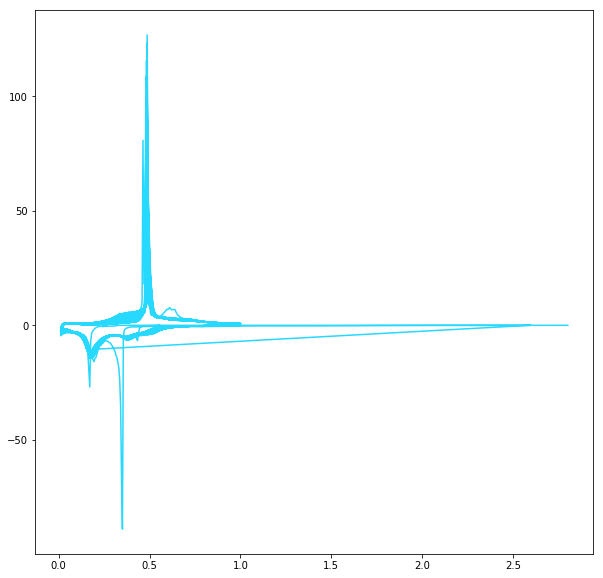

In [18]:
fig = plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
myplot = plt.plot(datatot['[V]'], datatot['[C/V]'], color = cmap(8/(int(datatot['Cycle C'].max()))))
#colors = [int(i % 23) for i in xy[0]
#These two rows (above) have to be in this order for the size to be applied. Essentially creates figure with format, then plots data 

## Plot with different colors for each cycle

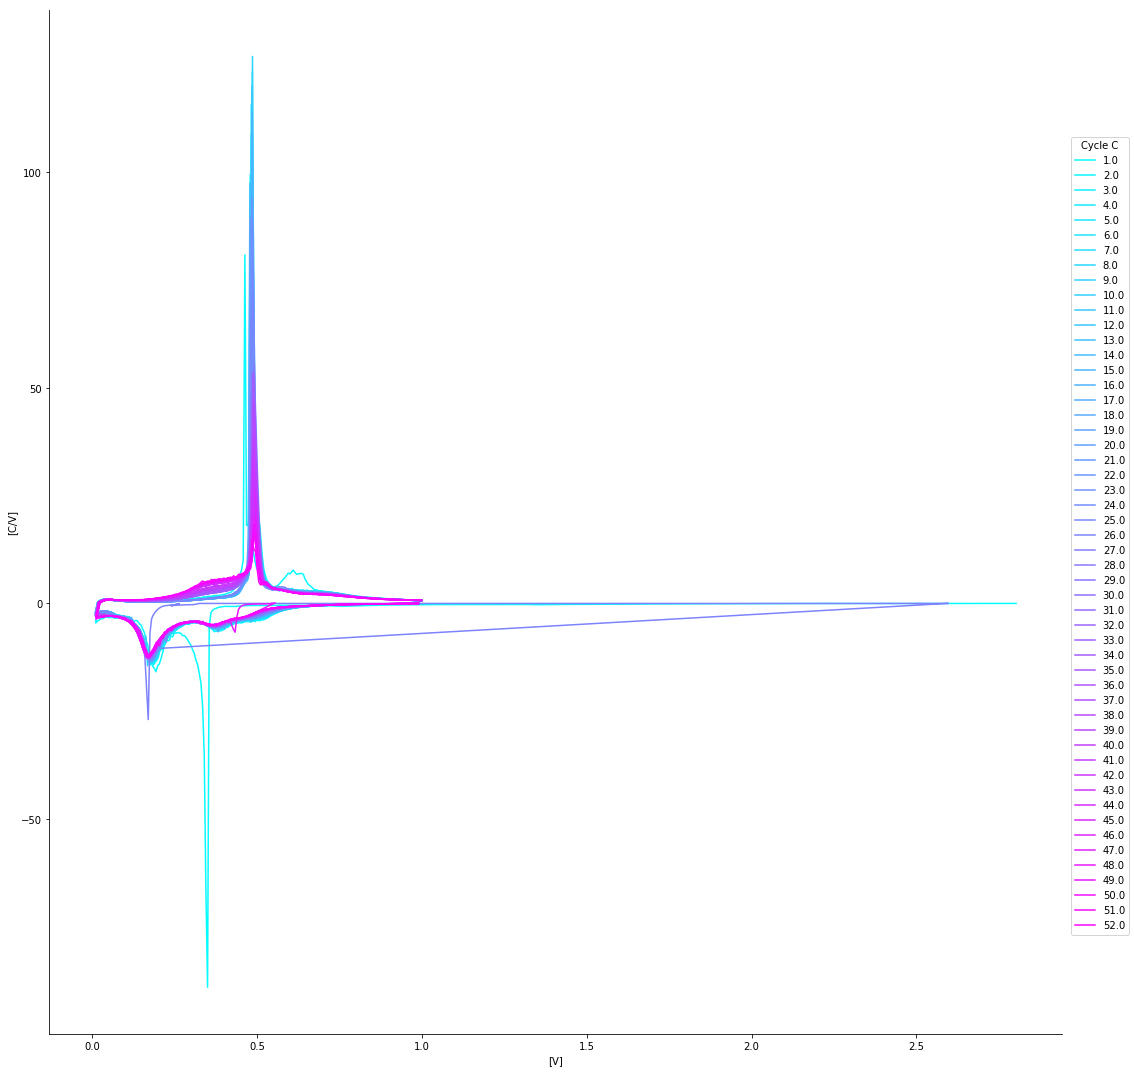

In [19]:
#fgframe = plt.figure(figsize=(20, 20), facecolor='w', edgecolor='k')
fg = sns.FacetGrid(data=datatot, hue='Cycle C', size = 15, palette = 'cool' )
fg.map(plt.plot, '[V]','[C/V]').add_legend()

 

## Separate charge/discharge data - reverse these 

In [20]:
chargedata = pd.DataFrame()
disdata = pd.DataFrame()
itnumber = datatot.shape[0]
for row in range(itnumber): 
    if datatot.loc[datatot.index[row], 'Md'] == 'C':
        chargedata = chargedata.append(datatot.loc[datatot.index[row]])
    elif datatot.loc[datatot.index[row], 'Md'] == 'D':
        disdata = disdata.append(datatot.loc[datatot.index[row]])
    else: 
        None 

        

In [19]:
chargedata.shape

(9419, 29)

In [20]:
disdata.shape

(8766, 29)

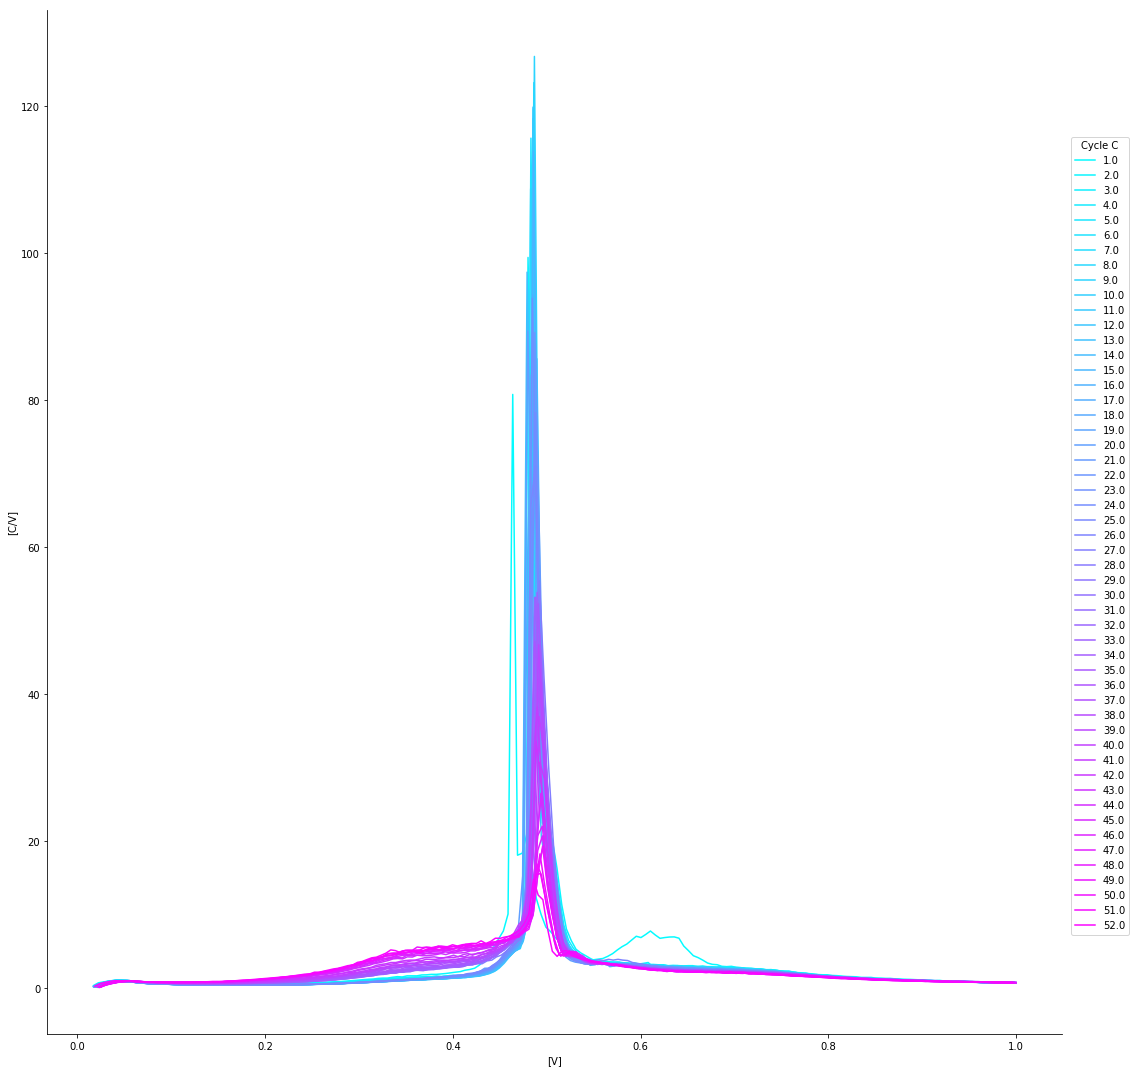

In [21]:
chrfgframe = plt.figure(figsize=(20, 20), facecolor='w', edgecolor='k')
chrfg = sns.FacetGrid(data=chargedata, hue='Cycle C', size = 15, palette = 'cool' )
chrfg.map(plt.plot, '[V]','[C/V]').add_legend()

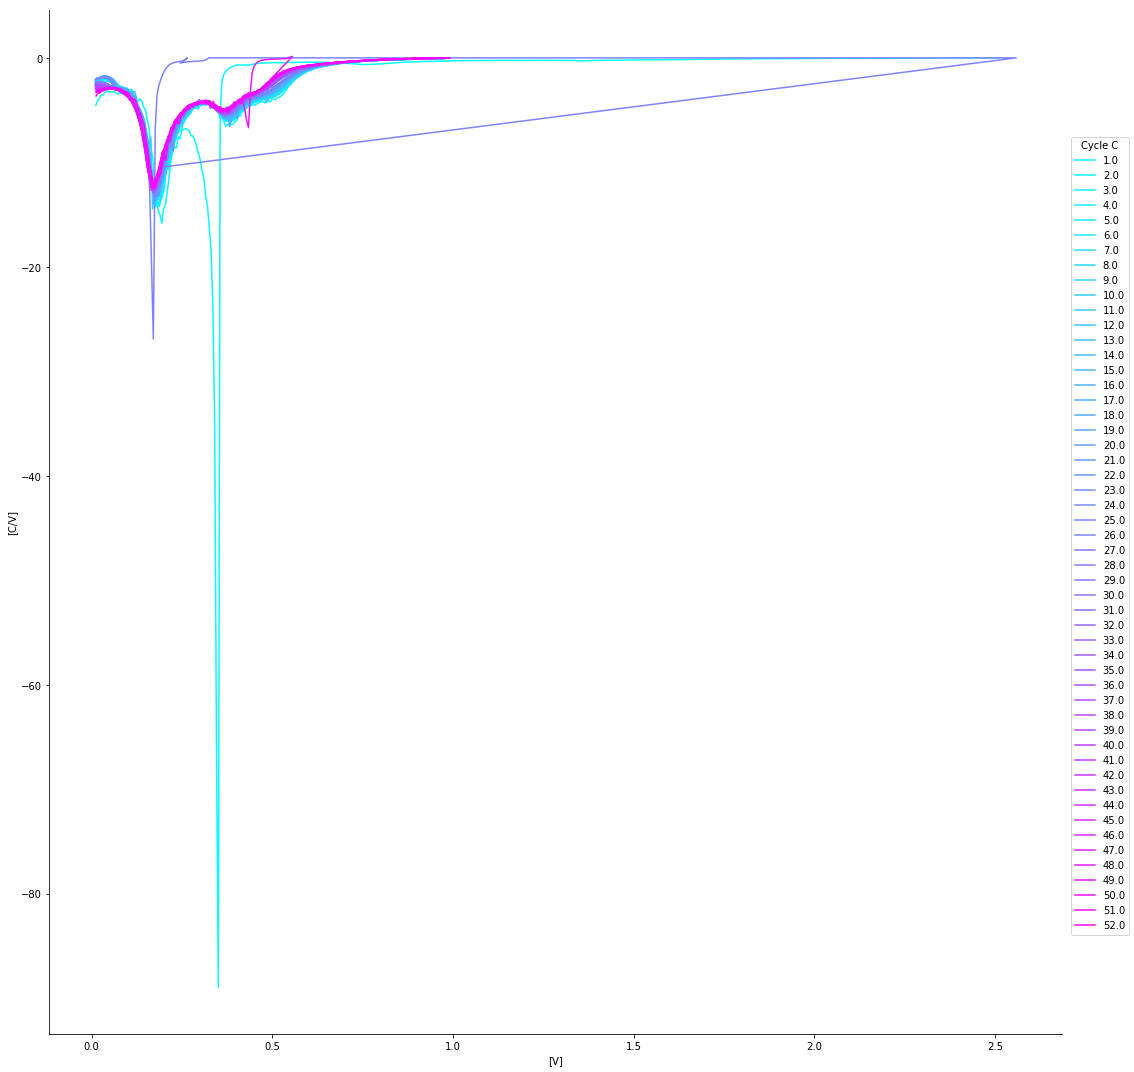

In [22]:
dischrfgframe = plt.figure(figsize=(20, 20), facecolor='w', edgecolor='k')
dischrfg = sns.FacetGrid(data=disdata, hue='Cycle C', size = 15, palette = 'cool' )
dischrfg.map(plt.plot, '[V]','[C/V]').add_legend()

In [23]:
datatot.loc[datatot.index[0], 'Md'] == 'C'

False

## Stagger Data to make it prettier - charging first

In [25]:
#chargedata['ScaledCV'] = np.nan
#this adds an empty column to charge data to fill with scaled data for each group 
#add a new column for max grp voltage
#chargedata['MaxGroupCV'] = np.nan
chargedata['StaggeredCV'] = np.nan

In [26]:
chargedata.columns

Index(['Cap. [Ah]', 'Current [A]', 'Cycle C', 'Cycle P', 'DPT Time', 'ES',
       'Ener. [Wh]', 'Md', 'Step', 'StepTime', 'TestTime', 'VAR1', 'VAR10',
       'VAR11', 'VAR12', 'VAR13', 'VAR14', 'VAR15', 'VAR2', 'VAR3', 'VAR4',
       'VAR5', 'VAR6', 'VAR7', 'VAR8', 'VAR9', 'Voltage [V]', '[C/V]', '[V]',
       'MaxGroupCV', 'StaggeredCV'],
      dtype='object')

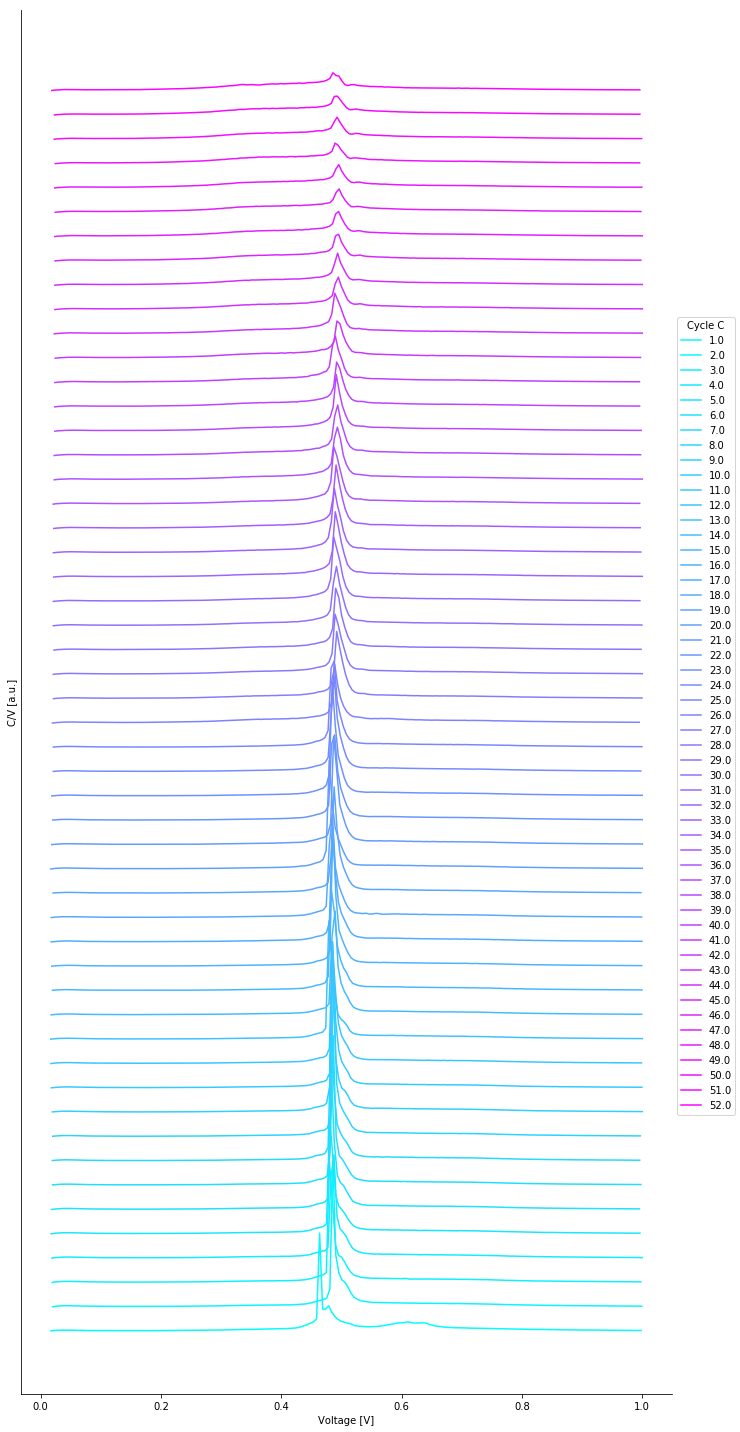

In [28]:
# find maximum voltage value for each cycle, scale rest of data so all maximums are equal (divide rest of data by that max, max for all will = 1)
#grpbycycle = chargedata.groupby(['Cycle C'], sort = False)
#maxcyclevolts = grpbycycle['[C/V]'].max()
#for row in range(chargedata.shape[0]):
   # chargedata.loc[chargedata.index[row],'MaxGroupCV'] = maxcyclevolts[chargedata.loc[chargedata.index[row],'Cycle C']]
#chargedata['ScaledCV'] = chargedata['[C/V]'] / chargedata['MaxGroupCV']
chargedata['StaggeredCV'] = chargedata['[C/V]'] + chargedata['Cycle C']*20
    
#stagchrfgframe = plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
stagchrfg = sns.FacetGrid(data=chargedata, hue='Cycle C', size = 20, aspect = 0.5 , palette = 'cool')
chargeplot = stagchrfg.map(plt.plot, '[V]','StaggeredCV')
chargeplot.set(yticks = [])
chargeplot.set_axis_labels('Voltage [V]', 'C/V [a.u.]')
chargeplot.add_legend()




In [29]:
chargedata.head()

,Cap. [Ah],Current [A],Cycle C,Cycle P,DPT Time,ES,Ener. [Wh],Md,Step,StepTime,...,VAR5,VAR6,VAR7,VAR8,VAR9,Voltage [V],[C/V],[V],MaxGroupCV,StaggeredCV
9029,5.000000e-07,0.000045,1.0,0.0,9/2/2016 18:01,1.0,1.000000e-08,C,3.0,0.667333,...,0.0,0.0,0.0,0.0,0.0,0.0171,0.32198,0.0171,NaN,20.32198
9037,1.490000e-06,0.000045,1.0,0.0,9/2/2016 18:03,1.0,3.000000e-08,C,3.0,2.000667,...,0.0,0.0,0.0,0.0,0.0,0.0223,0.69073,0.0223,NaN,20.69073
9047,2.740000e-06,0.000045,1.0,0.0,9/2/2016 18:04,1.0,6.000000e-08,C,3.0,3.667333,...,0.0,0.0,0.0,0.0,0.0,0.0278,0.81545,0.0278,NaN,20.81545
9057,3.980000e-06,0.000045,1.0,0.0,9/2/2016 18:06,1.0,1.000000e-07,C,3.0,5.334000,...,0.0,0.0,0.0,0.0,0.0,0.0328,0.88958,0.0328,NaN,20.88958
9068,5.350000e-06,0.000045,1.0,0.0,9/2/2016 18:08,1.0,1.400000e-07,C,3.0,7.167333,...,0.0,0.0,0.0,0.0,0.0,0.0379,0.96393,0.0379,NaN,20.96393


In [31]:
#maxcyclevolts[chargedata.loc[chargedata.index[450],'Cycle C']]

In [32]:
#maxcyclevolts[1]
#this give the maximum voltage of cycle 52

In [33]:
#group1 = grpbycycle.get_group(1)
#this gives you just cycle 1

NameError: name 'grpbycycle' is not defined

In [ ]:
#chargedata.shape[0]

In [ ]:
thing1 = grpbycycle.get_group(1)

In [ ]:
thing1['ScaledVoltage'] = thing1['[V]']/maxcyclevolts[1]

### Discharge Data

In [5]:
disdata['StaggeredCV'] = disdata['[C/V]'] - disdata['Cycle C']*10
    
stagdischrfg = sns.FacetGrid(data=disdata, hue='Cycle C', size = 20, aspect = 0.8 , palette = 'plasma')
dischargeplot = stagdischrfg.map(plt.plot, '[V]','StaggeredCV')
dischargeplot.set(yticks = [])
dischargeplot.set_axis_labels('Voltage [V]', 'C/V [a.u.]')
dischargeplot.add_legend()

NameError: name 'disdata' is not defined

## Smoothing the data
https://stackoverflow.com/questions/20618804/how-to-smooth-a-curve-in-the-right-way

In [ ]:
def savitzky_golay(y, window_size, order, deriv=0, rate=1):
    r"""Smooth (and optionally differentiate) data with a Savitzky-Golay filter.
    The Savitzky-Golay filter removes high frequency noise from data.
    It has the advantage of preserving the original shape and
    features of the signal better than other types of filtering
    approaches, such as moving averages techniques.
    Parameters
    ----------
    y : array_like, shape (N,)
        the values of the time history of the signal.
    window_size : int
        the length of the window. Must be an odd integer number.
    order : int
        the order of the polynomial used in the filtering.
        Must be less then `window_size` - 1.
    deriv: int
        the order of the derivative to compute (default = 0 means only smoothing)
    Returns
    -------
    ys : ndarray, shape (N)
        the smoothed signal (or it's n-th derivative).
    Notes
    -----
    The Savitzky-Golay is a type of low-pass filter, particularly
    suited for smoothing noisy data. The main idea behind this
    approach is to make for each point a least-square fit with a
    polynomial of high order over a odd-sized window centered at
    the point.
    Examples
    --------
    t = np.linspace(-4, 4, 500)
    y = np.exp( -t**2 ) + np.random.normal(0, 0.05, t.shape)
    ysg = savitzky_golay(y, window_size=31, order=4)
    import matplotlib.pyplot as plt
    plt.plot(t, y, label='Noisy signal')
    plt.plot(t, np.exp(-t**2), 'k', lw=1.5, label='Original signal')
    plt.plot(t, ysg, 'r', label='Filtered signal')
    plt.legend()
    plt.show()
    References
    ----------
    .. [1] A. Savitzky, M. J. E. Golay, Smoothing and Differentiation of
       Data by Simplified Least Squares Procedures. Analytical
       Chemistry, 1964, 36 (8), pp 1627-1639.
    .. [2] Numerical Recipes 3rd Edition: The Art of Scientific Computing
       W.H. Press, S.A. Teukolsky, W.T. Vetterling, B.P. Flannery
       Cambridge University Press ISBN-13: 9780521880688
    """
    import numpy as np
    from math import factorial
    
    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except ValueError:
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')